0      0
1      1
2      1
3      1
4      0
      ..
627    0
628    0
629    1
630    1
631    0
Name: Survived, Length: 632, dtype: int64


,PassengerId,Survived,Pclass,Age,Fare,male
0,1,0,3,22.0,7.2500,1
1,2,1,1,38.0,71.2833,0
2,3,1,3,26.0,7.9250,0
3,4,1,1,35.0,53.1000,0
4,5,0,3,35.0,8.0500,1
...,...,...,...,...,...,...
627,886,0,3,39.0,29.1250,0
628,887,0,2,27.0,13.0000,1
629,888,1,1,19.0,30.0000,0
630,890,1,1,26.0,30.0000,1


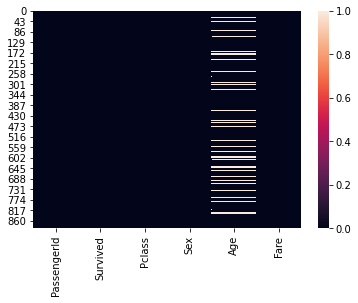

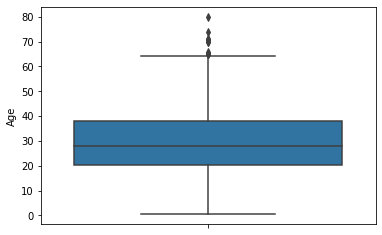

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('data/train.csv')
plt.figure(5)
df=df.drop(columns=['Name','SibSp','Ticket','Cabin','Parch','Embarked'])
sns.heatmap(df.isnull(),),
plt.figure(2)
sns.boxplot(data=df,y='Age')
# from boxplot 75th%ile seems to b 38 n 25th percentile seems to be 20.....
#so multiplying by 1.5  at both ends so Age(10,57) seems good and any value outside this ...lets consider as outliers..
#also using this age for calaculating mean for replacing na values of age.
df=df.loc[df['Age'].between(9,58),]
df=df.reset_index(drop=True,)
class_3_age=df.loc[df['Pclass']==3].Age.mean()
class_2_age=df.loc[df['Pclass']==2].Age.mean()
class_1_age=df.loc[df['Pclass']==1].Age.mean()
def remove_null_age(data):
    agee=data[0]
    pclasss=data[1]
    if pd.isnull(agee):
        if pclasss==1:
            return class_1_age
        elif pclasss==2:
            return class_2_age
        else:
            return  class_3_age

    return agee
df['Age']=df[["Age","Pclass"]].apply(remove_null_age,axis=1)

sex=pd.get_dummies(df['Sex'],drop_first=True)
sex=sex.reset_index(drop=True)
df=df.drop(columns=['Sex'])
df=pd.concat([df,sex],axis=1)
survived=df["Survived"]
print(survived)
df







In [2]:
from  sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df.drop("Survived",axis=1),survived,test_size=.27,random_state=101)

from sklearn.linear_model import LogisticRegression
logisticreg=LogisticRegression()
logisticreg.fit(x_train,y_train)
predictions=logisticreg.predict(x_test)

from sklearn.metrics import  accuracy_score
print(logisticreg.score(x_train, y_train))

0.8004338394793926


In [3]:
df=pd.read_csv('data/train.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


0.9617224880382775


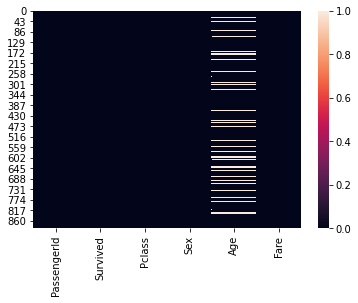

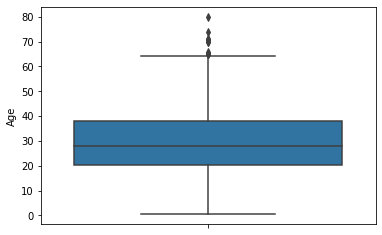

In [4]:
df=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
test_survived=pd.read_csv('data/gender_submission.csv')
plt.figure(5)
df=df.drop(columns=['Name','SibSp','Ticket','Cabin','Parch','Embarked'])
test=test.drop(columns=['Name','SibSp','Ticket','Cabin','Parch','Embarked'])
sns.heatmap(df.isnull(),),
plt.figure(2)
sns.boxplot(data=df,y='Age')
# from boxplot 75th%ile seems to b 38 n 25th percentile seems to be 20.....
#so multiplying by 1.5  at both ends so Age(10,57) seems good and any value outside this ...lets consider as outliers..
#also using this age for calaculating mean for replacing na values of age.
df=df.loc[df['Age'].between(9,58),]
# test=test.loc[test['Age'].between(9,58),]
# test=test.loc[test['Age'].between(9,58),]

df=df.reset_index(drop=True,)
class_3_age=df.loc[df['Pclass']==3].Age.mean()
class_2_age=df.loc[df['Pclass']==2].Age.mean()
class_1_age=df.loc[df['Pclass']==1].Age.mean()
def remove_null_age(data):
    agee=data[0]
    pclasss=data[1]
    if pd.isnull(agee):
        if pclasss==1:
            return class_1_age
        elif pclasss==2:
            return class_2_age
        else:
            return  class_3_age

    return agee
df['Age']=df[["Age","Pclass"]].apply(remove_null_age,axis=1)
test['Age']=test[["Age","Pclass"]].apply(remove_null_age,axis=1)


sex=pd.get_dummies(df['Sex'],drop_first=True)
test_sex=pd.get_dummies(test['Sex'],drop_first=True)
sex=sex.reset_index(drop=True)
test_sex=test_sex.reset_index(drop=True)
df=df.drop(columns=['Sex'])
test=test.drop(columns=['Sex'])
df=pd.concat([df,sex],axis=1)
test=test.reset_index(drop=True)
df=df.reset_index(drop=True)

test=pd.concat([test,test_sex],axis=1)
survived_df=df["Survived"]
df=df.drop(columns='Survived')
test["Age"]=test['Age'].round(1)
test.at[152,'Fare']=30

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(df,survived_df)
predictions=logreg.predict(test)

from sklearn.metrics import  accuracy_score
accuracy=accuracy_score(test_survived['Survived'],predictions)
print(accuracy)



In [5]:
test1=pd.read_csv('data/test.csv')
test_survived1=pd.read_csv('data/gender_submission.csv')
print(x_train)
print(x_test)
print(y_train)
print(y_test)
test1

     PassengerId  Pclass   Age      Fare  male
333          477       2  34.0   21.0000     1
363          519       2  36.0   26.0000     0
432          621       3  27.0   14.4542     1
118          168       3  45.0   27.9000     0
585          831       3  15.0   14.4542     0
..           ...     ...   ...       ...   ...
75           114       3  20.0    9.8250     0
599          853       3   9.0   15.2458     0
575          813       2  35.0   10.5000     1
337          483       3  50.0    8.0500     1
523          743       1  21.0  262.3750     0

[461 rows x 5 columns]
     PassengerId  Pclass   Age      Fare  male
518          735       2  23.0   13.0000     1
191          273       2  41.0   19.5000     0
447          641       3  20.0    7.8542     1
334          478       3  29.0    7.0458     1
603          857       1  45.0  164.8667     0
..           ...     ...   ...       ...   ...
344          493       1  55.0   30.5000     1
62            98       1  23.0   63.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
print(submission)
submission.to_csv('titanic_submission.csv',index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
